# Time Series

## ACVF - Auto Covariance Function

## ACF - Auto Correlation Function

- ACVF and ACF functions help to understand correlation within the time-series itself. To see how one value in ts is correlated to other values in ts.
- From ACVF we get the ACF.
- We want to understand correlation within the ts. e.g. stock prices - maybe price depends on last 2 days price (blue curve) so we say blue ts is related at a lag1 as well as lag2, black curve at lag4 etc

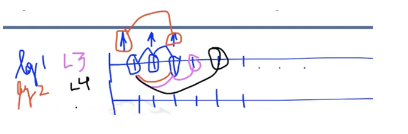

- For the case of black curve since lag=4 so Sunday value depends on/correlates with Thurs, Sat value on Wed like if high value on wed, will get a high value on Sat
- We say a correlation of 0.4 at a certain lag (e.g. lag 4) then that correlation can apply to any day Mon& Thur, Tue& Fri, Wed& Sat.

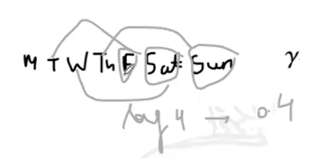

## ACVF - Auto Covariance Function


- Covarience function for two time series x and y as shown below.

- Autocovariance means we r working with a single time series. The other one is replaced by just a lagged version of itself.

**Covariance**

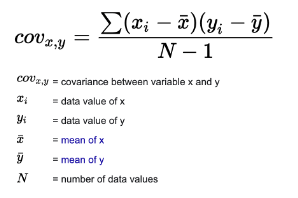

**Autocovariance**

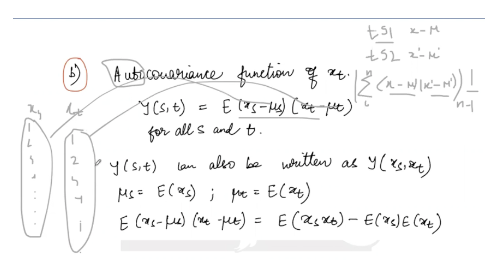

# ACF - Auto Correlation Function 
### (Plot of ACF is called as Correlogram)

**Correlation**

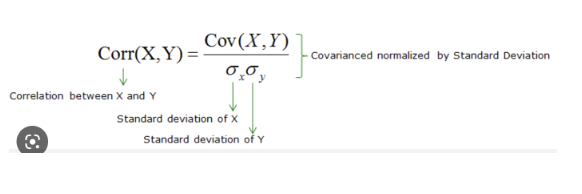

**Autocorrelation**

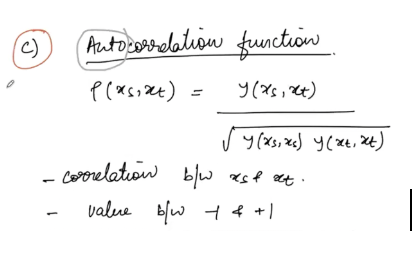

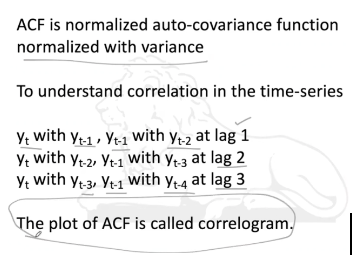

## Difference b/w Covariance and Correlation

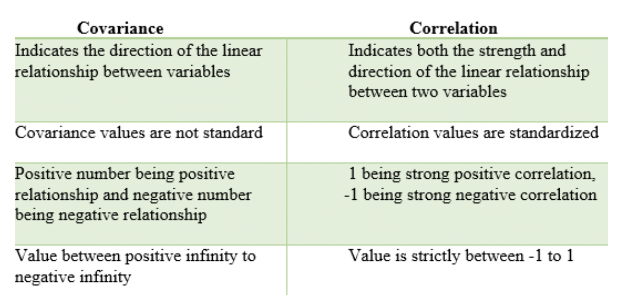

## CCF - Cross Correlation Function



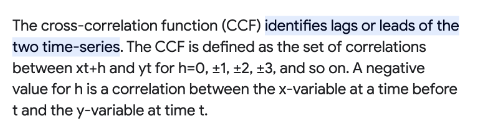

# Stationary Time Series

Whenever we refer to Stationary Time series we refer to this weakly time series.

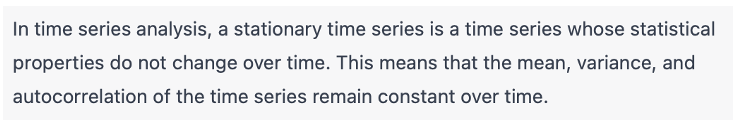

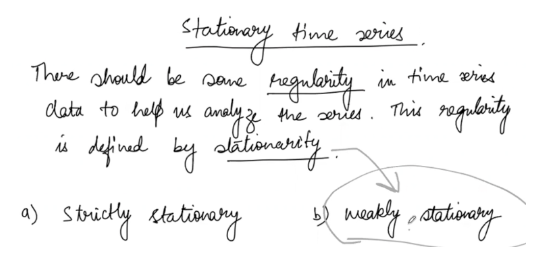

## Strictly stationary

- Strictly Stationary TS states u can compare 2 time series only if they both have identical distributions at a certain lag. 
- For eg here 2 time series where data points are correlated at a lag of 14 (2 weeks), that is u r trying to correlate 1 to 15, 2 to 16, 3 to 17 so joint distributions/pdf functions should be same.


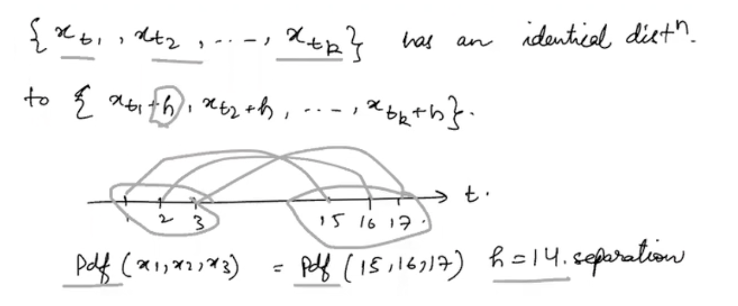

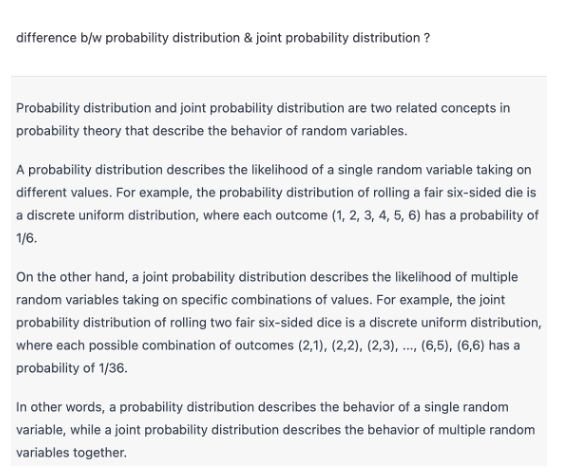

pdf is not on time variable but how data is distributed/random variable like normal distribution, exponential/lognormal. xt1,xt2 are values of random variable at time t1,t2 and not time itself.So pdf holds on random variable values e.g. temp not time.

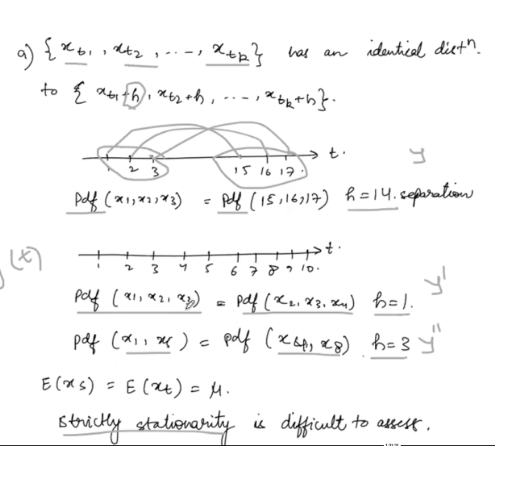

## Weakly stationary

In weak stationarity we neglect the assumption that both ts should have same Joint probability distribution.


So in weak stationarity we only folllow below 2 things- mean constant over time & autocorrelationdepends only on lag & not on joint pdf. 

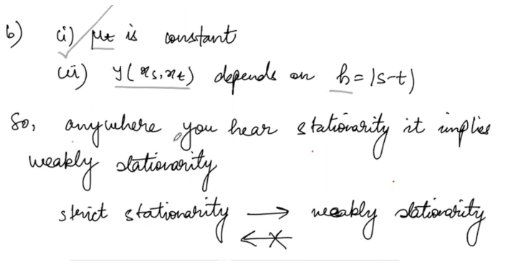

Strict Stationarity implies weak Stationarity but not vice versa cz joint pdf condition does not hold true in weak Stationarity.

# ACF - Practical

* How to identify the scope for prediction in a time series data
* How to interpret auto correlation function and its plot
* How does the ACF plot of an unpredictable time series look like

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf  # tsaplots i.e. time series plots
from sklearn.metrics import mean_squared_error

# Create a stationary time series (mean and std/var are same)

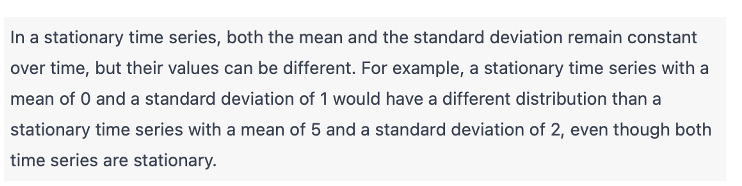

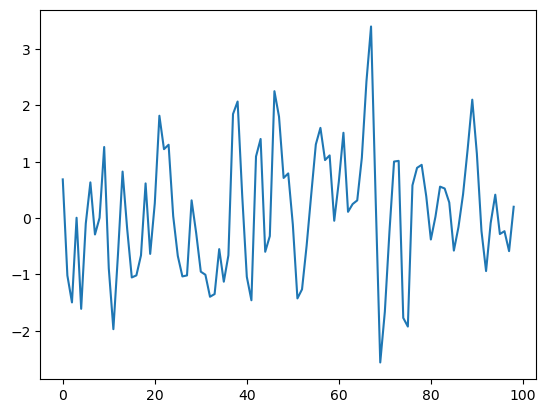

In [2]:
# Creating stationary ts through MA Model

np.random.seed(1)
errors = [np.random.randn()] # Creating synthetic error; initiating with random error and then storing the error in this list
ts = [] # creating time series data 

for x in range(1,100):
    curr_error = np.random.randn()
    curr_value = curr_error + 0.8*errors[x-1] # MA model and '0.8' is assumed. 
                                              # curr value = curr error + m*previous error 
    errors.append(curr_error)
    ts.append(curr_value)
plt.plot(ts);


# Convert time series data into Dataframe

In [3]:
#df = pd.DataFrame({'time_series':ts}, index=['day- %d' %x for x in range(1,100)])
df = pd.DataFrame({'time_series':ts}, index=['day- %d' %x for x in range(len(ts))])
df.head()

,time_series
day- 0,0.687720
day- 1,-1.017577
day- 2,-1.495506
day- 3,0.007033
day- 4,-1.609213


# Compare one time instant with its previous time instant in same DF

In [4]:
df['ts_shift1'] = df['time_series'].shift(1)
df.head()
# lag is one day after shifting

,time_series,ts_shift1
day- 0,0.687720,NaN
day- 1,-1.017577,0.687720
day- 2,-1.495506,-1.017577
day- 3,0.007033,-1.495506
day- 4,-1.609213,0.007033


### Find correlation b/w current and previous 

By correlation it means it is trying to find correlation b/w original & shifted values e.g. -1.01 and 0.68, then -1.49 & -1.01 etc

In [5]:
np.corrcoef(df.dropna()['time_series'], df.dropna()['ts_shift1'])


array([[1.        , 0.47357121],
       [0.47357121, 1.        ]])

A positive correlation between two variables means that they tend to increase or decrease together, and this relationship is quantified by a positive correlation coefficient.

Positive Correlation of 0.47 here.

# Compare current time instant with its previous to previous time instant(day b4 yesterday) 

In [6]:
df['ts_shift2'] = df['time_series'].shift(2)
df.head()

,time_series,ts_shift1,ts_shift2
day- 0,0.687720,NaN,NaN
day- 1,-1.017577,0.687720,NaN
day- 2,-1.495506,-1.017577,0.687720
day- 3,0.007033,-1.495506,-1.017577
day- 4,-1.609213,0.007033,-1.495506


- With lag of 2 we r getting a -ve correlation.
- Negative correlation is a statistical measure that describes the relationship between two variables, where an increase in one variable is associated with a decrease in the other variable. In other words, when two variables are negatively correlated, they tend to move in opposite directions.

# Create lags for previous 9 days with current day

In [7]:
df = pd.DataFrame({'ts':ts}, index = ['day_%d'%x for x in range(len(ts))])
for x in range(1,10):
    df['lag_%d'%x] = df['ts'].shift(x)
    
df.head(15)

,ts,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
day_0,0.687720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_1,-1.017577,0.687720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_2,-1.495506,-1.017577,0.687720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_3,0.007033,-1.495506,-1.017577,0.687720,NaN,NaN,NaN,NaN,NaN,NaN
day_4,-1.609213,0.007033,-1.495506,-1.017577,0.687720,NaN,NaN,NaN,NaN,NaN
day_5,-0.096419,-1.609213,0.007033,-1.495506,-1.017577,0.687720,NaN,NaN,NaN,NaN
day_6,0.634643,-0.096419,-1.609213,0.007033,-1.495506,-1.017577,0.687720,NaN,NaN,NaN
day_7,-0.289926,0.634643,-0.096419,-1.609213,0.007033,-1.495506,-1.017577,0.687720,NaN,NaN
day_8,0.005861,-0.289926,0.634643,-0.096419,-1.609213,0.007033,-1.495506,-1.017577,0.687720,NaN
day_9,1.262612,0.005861,-0.289926,0.634643,-0.096419,-1.609213,0.007033,-1.495506,-1.017577,0.687720


#### Find correlation of time series with its lagged version lagged by lag1 upto lag9

In [8]:
df.corr()

,ts,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9
ts,1.000000,0.473571,-0.119781,-0.191369,-0.071648,0.095816,0.090630,-0.091882,-0.115884,0.047162
lag_1,0.473571,1.000000,0.475174,-0.119541,-0.191193,-0.071926,0.095949,0.091682,-0.091705,-0.117055
lag_2,-0.119781,0.475174,1.000000,0.474449,-0.122020,-0.189803,-0.073190,0.090147,0.089824,-0.085914
lag_3,-0.191369,-0.119541,0.474449,1.000000,0.473921,-0.121246,-0.190483,-0.076683,0.089160,0.093629
lag_4,-0.071648,-0.191193,-0.122020,0.473921,1.000000,0.475387,-0.121944,-0.195085,-0.077951,0.093449
lag_5,0.095816,-0.071926,-0.189803,-0.121246,0.475387,1.000000,0.476165,-0.119816,-0.194402,-0.080923
lag_6,0.090630,0.095949,-0.073190,-0.190483,-0.121944,0.476165,1.000000,0.476833,-0.120445,-0.193462
lag_7,-0.091882,0.091682,0.090147,-0.076683,-0.195085,-0.119816,0.476833,1.000000,0.476252,-0.112305
lag_8,-0.115884,-0.091705,0.089824,0.089160,-0.077951,-0.194402,-0.120445,0.476252,1.000000,0.481567
lag_9,0.047162,-0.117055,-0.085914,0.093629,0.093449,-0.080923,-0.193462,-0.112305,0.481567,1.000000


*It is generally the case observed that as u go back in time in time series like ts with lag1, then lag2, ... lagn, the amount of correlation also decreases.*

## Focus on current day value and compare with all previous days on bar chart

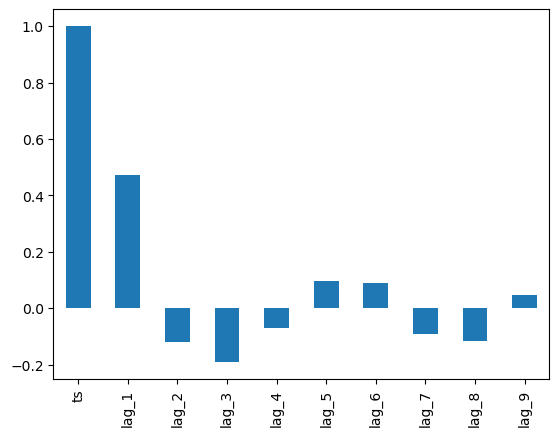

In [9]:
df.corr()['ts'].plot.bar();

* From above graph we can say that current day(ts) has correlation with yesterday's value(lag_1) of around 0.5
* And current day(ts) has correlation with day b4 yesterday's value(lag_2) of around -0.1 and so on
* Later we see a better ACF plot which is built for this purpose.

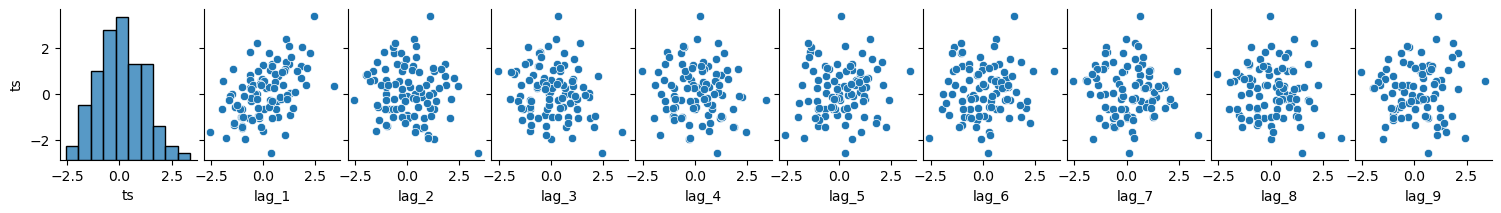

In [10]:
import seaborn as sns
sns.pairplot(df, y_vars="ts", x_vars=df.columns.values)
plt.gcf().set_size_inches(15, 2)

# Draw an ACF plot to find scope for prediction

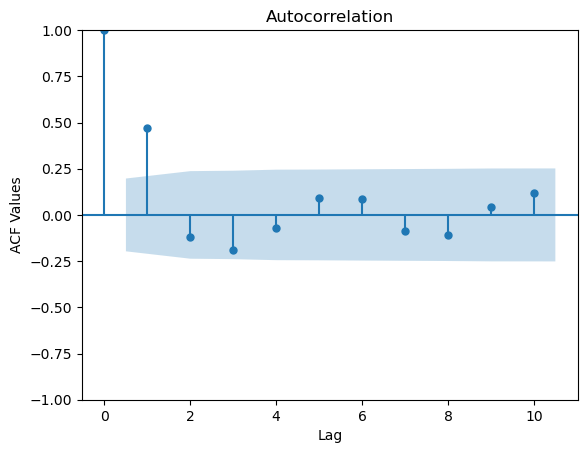

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['ts'], lags=10)
plt.xlabel('Lag')
plt.ylabel('ACF Values');

<font color=blue>*Since we are comparing time series data with its own past values it is called as Autocorrelation*

Blue region is actually the confidence interval. Any value above blue region u say statistically significant value. Any value within the blue region is statistically insignificant value. We only consider the values that r above the blue region.

* At Lag 0, correlaion=1 cz it just correlation with itself, perfect correlation. At lag 1 +ve correlation then further few -ve correlations etc
* From above graph we can see that we have only one **significant value of '0.5'** (being outside the shaded area) at lag 1 and rest other values are insignificant '~zero' (being inside the shaded area)
* As today's data depends upon yesterday's data, thats why there is some **scope for prediction** (whenever we find significant value in the above graph) in this time series data 

 # Compare above ts data ACF plot with a White Noise ACF plot to know 'scope for prediction'

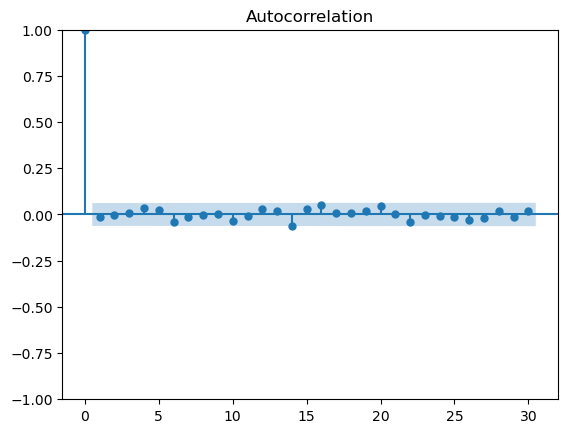

In [12]:
# creating a synthetic signal(data)
np.random.seed(11)
white_noise = np.random.randn(1000)
plot_acf(white_noise);

* In the above graph we can't see any significant value hence there is no scope for prediction
* All correlations in this graph even if present r statistically insignificant.
* If u get ACF something like above, its an indication of white noise.

# <font color=blue>Two Tools to find out if White Noise is Present

**Method1 FFT** -  Find out fft & if many frequency components present it is W.noise.


**Method2 ACF** - Do an ACF Plot & check if every other value apart from lag0 r within the blue region.

# Temperature Dataset

In [13]:
data = pd.read_csv('datasets/temperature.csv')
data.head()

,date,temp_sensor1,temp_sensor2
0,01-01-2019,0.000000,0.087449
1,02-01-2019,0.587785,0.520538
2,03-01-2019,0.951057,1.277838
3,04-01-2019,0.951057,1.254473
4,05-01-2019,0.587785,0.925179


# Draw an acf_plot for 2nd col 

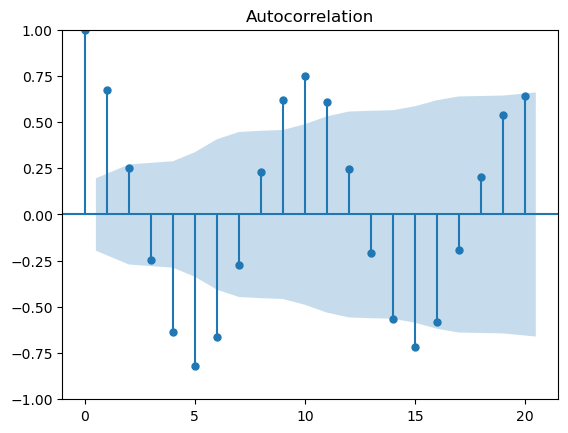

In [14]:
plot_acf(data['temp_sensor2']);

* In above graph we can see that there are mutliple values above and below shaded area which means there is a scope for prediction cz some correlations we do obtain.


<font color=blue>*If we find certain +ve or -ve correlations in ACF PLot apart from Lag0 it means there is scope for prediction within that time-series*

*Next question is now since here there r many lags having significant values (outside blue region) so which one to be picked/which one most imp for prediction?*

# Plot residual on ACF 

In [15]:
time_step = 1
period = 10
freq = 1/period
time_vec = np.array(range(len(data)))

predicted = (np.sin(2*np.pi*freq*time_vec)) # sine wave equation, assumed model

residual = data['temp_sensor2'] - predicted
residual

0     0.087449
1    -0.067248
2     0.326781
3     0.303416
4     0.337394
        ...   
95    0.123176
96    0.288953
97    0.364435
98   -0.390325
99    0.479100
Name: temp_sensor2, Length: 100, dtype: float64

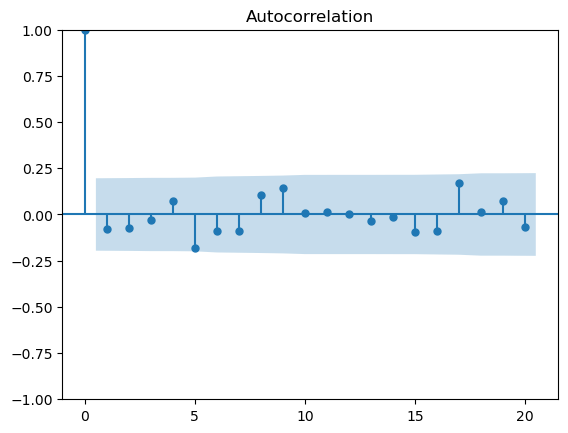

In [16]:
plot_acf(residual);

* Above **residual graph** represents white noise having no scope for prediction
* Even if **residual graph** has predictable component it will be underfitting, we can go for some complex model and then further utilize the characteristics of the model to identify the remaining predictible portion

# Very imp - 3 Characteristics of ACF Plot
* 1. Whether there is a scope for prediction for linear model
* 2. Whether residual after prediction looks like a white noise 
* 3. Whether we need to choose MA, AR or ARMA model. Now these models will be our theoritical models to model r time series.

In [17]:
time_step = 1
period = 10
freq = 1/period
time_vec = np.array(range(len(data)))

predicted = (np.sin(2*np.pi*freq*time_vec)) # sine wave equation

residual = data['temp_sensor1'] - predicted
residual

0     0.000000e+00
1    -2.924732e-10
2    -2.951536e-10
3    -2.951537e-10
4    -2.924733e-10
          ...     
95    4.574028e-19
96    2.924713e-10
97    2.951540e-10
98    2.951543e-10
99    2.924779e-10
Name: temp_sensor1, Length: 100, dtype: float64

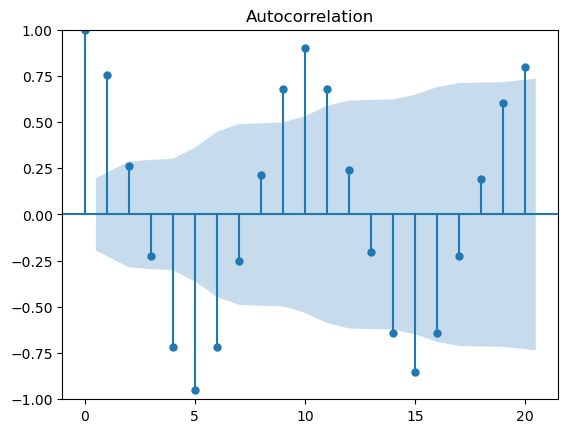

In [18]:
plot_acf(residual);

## Difference b/w Statistical  & ML Tools for time series

- In Time series we work with understanding the underlying model that is there that what is building the time series. So here we r trying to work with the statistics of time series itself -the correlation, the mean, variance etc. Here we r working with correlations within data itself. This is MODELLING APPROACH.- top fig

- In LSTM/RNN we work with the data itself. Given our time series that is there we work with predictions at a different stage & how we predict is our LSTM model itself. Prediction is compared with actual data point & depending on difference that is there it tries to modify this model/equ. that is present & this happens repeatedly. THIS IS DATA CENTRIC APPROACH.- bottom fig, predict, error & fine tune again & again in LSTM

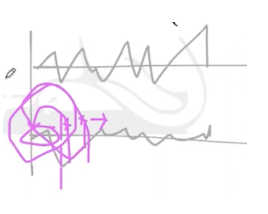